# Neural & Behavioral Modeling - Week 12 (Exercises)
趙冠豪 (ntueeb05howard@gmail.com)

In [59]:
# Upgrade PyTorch to 0.4.0 if necessary:
! conda install -y pytorch-cpu torchvision-cpu -c pytorch

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - torchvision-cpu
  - pytorch-cpu

Current channels:

  - https://conda.anaconda.org/pytorch/osx-64
  - https://conda.anaconda.org/pytorch/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/osx-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/pro/osx-64
  - https://repo.anaconda.com/pkgs/pro/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
%config IPCompleter.greedy=True 
%matplotlib inline
from matplotlib.pyplot import *
from IPython.display import *
import numpy as np

In [3]:
# Check GPU status:
import torch as t
print('PyTorch version:',t.__version__)
use_cuda=t.cuda.is_available()
if(use_cuda):
    for i in range(t.cuda.device_count()):
        print('Device ',i,':',t.cuda.get_device_name(i))
    print('Current: Device ',t.cuda.current_device())
    t.backends.cudnn.benchmark = True 
    device = t.device("cuda")
else:
    t.manual_seed(999)
    device = t.device("cpu")
    print('No GPU')

PyTorch version: 0.4.0
No GPU


## 1 Fair Performance Evaluation (5 points)
We often compare and assess performances of different model architectures/parameters/hyperparameters. Note that the results are differnt even if you re-run exactly the same code block. This is primarily due to a non-fixed random number seed. Please:

(1) run the section 1.2 TEN times and report (a) min, (b) max, (c) mean, & (d) standard deviation of the TESTING accuracies. (3 points)

(2) try to fix the random number seeds in numpy & pytorch to see if you can obtain the same results every time in the section 1.2. (2 points)

### 1.0 CIFAR-10 dataset

In [12]:
# Load the dataset:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
train_set = CIFAR10(root='.', train=True, transform=transforms.ToTensor(),download=True)
train_data = t.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_set = CIFAR10(root='.', train=False, transform=transforms.ToTensor())
test_data = t.utils.data.DataLoader(test_set, batch_size=1000, shuffle=True)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [13]:
train_data

### 1.1 The model

In [14]:
# Make the model:
import torch as th
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() # = nn.Module.__init__(self)
        self.conv1 = nn.Conv2d(3, 6, 5) # in, out, kernel
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.fc1   = nn.Linear(16*5*5, 120) 
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)
    def forward(self, x): # functional expressions
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x

In [15]:
lenet = Net()
lenet = lenet.to(device)
loss_fn = t.nn.CrossEntropyLoss()
optimizer = t.optim.Adam(lenet.parameters())

### 1.2 Training & Testing

In [22]:
# Training:
for e in range(2):
    for i, (X_train, Y_train) in enumerate(train_data, 0):
        X_train,Y_train=X_train.to(device),Y_train.to(device)
#         print("X_train : ", X_train, "\nY_train : ", Y_train)
        Y_pred = lenet(X_train)
#         print(Y_pred)
        loss = loss_fn(Y_pred, Y_train)
        lenet.zero_grad()
        loss.backward()
        optimizer.step()   
        Y_pred = lenet(X_train)
        Y_pred = t.max(Y_pred,1)[1]
        print((Y_pred==Y_train).sum().item())
    print('epoch ',e,':',(Y_pred==Y_train).sum().item()/Y_train.shape[0])

19
14
19
14
23
20
19
20
16
14
19
18
22
18
21
15
16
19
19
19
16
23
18
18
19
19
15
19
21
18
17
19
16
21
17
16
21
18
13
19
17
14
19
18
14
17
20
15
17
14
20
17
16
14
15
14
16
20
15
22
16
10
12
21
17
19
20
13
23
17
20
23
15
20
24
20
16
15
18
15
21
14
19
21


KeyboardInterrupt: 

In [143]:
# Testing on a batch:
dataiter = iter(test_data)
X_test, Y_test = dataiter.next() # returning a batch
X_test,Y_test=X_test.to(device),Y_test.to(device)
with t.no_grad():
    Y_pred = lenet(X_test)
    Y_pred = t.max(Y_pred,1)[1]
    print('test :',(Y_pred==Y_test).sum().item()/Y_test.shape[0])

test : 0.48


### 1.3 Your answers

#### 1.1 answer  (report (a) min, (b) max, (c) mean, & (d) standard deviation of the TESTING accuracies)

1.

epoch  0 : 0.5
epoch  1 : 0.1875
test : 0.503

2.

epoch  0 : 0.5625
epoch  1 : 0.4375
test : 0.59

3.

epoch  0 : 0.8125
epoch  1 : 0.5625
test : 0.597

4.

epoch  0 : 0.75
epoch  1 : 0.625
test : 0.648

5.

epoch  0 : 0.5625
epoch  1 : 0.6875
test : 0.724

6.

epoch  0 : 0.75
epoch  1 : 0.6875
test : 0.693

7.

epoch  0 : 0.5
epoch  1 : 0.375
test : 0.509

8.

epoch  0 : 0.4375
epoch  1 : 0.5625
test : 0.516

9.

epoch  0 : 0.5625
epoch  1 : 0.5625
test : 0.591

10.

epoch  0 : 0.625
epoch  1 : 0.75
test : 0.599

11.

epoch  0 : 0.3125
epoch  1 : 0.625
test : 0.488

12.

epoch  0 : 0.5
epoch  1 : 0.6875
test : 0.618

In [75]:
test_accuracy = [0.503, 0.59, 0.597, 0.648, 0.724, 0.693, 0.509, 0.516, 0.591, 0.599, 0.488, 0.618]

In [77]:
min(test_accuracy)

0.488

In [76]:
max(test_accuracy)

0.724

In [84]:
import statistics as s
s.mean(test_accuracy)

0.5896666666666667

In [85]:
s.stdev(test_accuracy)

0.07559020298873913

**minimum : 0.488**

**maximum : 0.724** 

**average : 0.590**

**standard deviation : 0.076**

#### 1.2 answer ( fix the random number seeds)¶

After setting seed() for cpu (```t.manual_seed(999)```)

1. 

epoch  0 : 0.375
epoch  1 : 0.5
test : 0.48

2.

epoch  0 : 0.375
epoch  1 : 0.5
test : 0.48

==> the same !!

key point :

Because I am using cpu, the way I fix the seed is to add `t.manual_seed(999)` when checking CPU state

```
# Check GPU status:
import torch as t
print('PyTorch version:',t.__version__)
use_cuda=t.cuda.is_available()
if(use_cuda):
    for i in range(t.cuda.device_count()):
        print('Device ',i,':',t.cuda.get_device_name(i))
    print('Current: Device ',t.cuda.current_device())
    t.backends.cudnn.benchmark = True 
    device = t.device("cuda")
else:
    t.manual_seed(999)    # add this line to fix the seed
    device = t.device("cpu")
    print('No GPU')
```

### Self note

LeNet()  : 較早期的神經網路  [關於辨認數字的model說明](http://noahsnail.com/2017/03/02/2017-3-2-LeNet神经网络/#2-1-LeNet第一层（卷积运算）)

AlexNet()  : AlexNet包含8層變換，其中有五層卷積和兩層全連接隱含層，以及一個輸出層

VGGNet()  : VGG使用了編程語言自帶的便利，採用了函數和循環的方式，複製了網絡結構裏面的大量重複結構，因此可以很緊湊來構造這些網絡。而第一個使用這種結構的深度網絡是VGG

NiNNet()  : 一塊主要由卷積層構成，另一塊主要是全連接層。在Alexnet裏我們看到如何把卷積層塊和全連接層分別加深加寬從而得到深度網絡。另外一個自然的想法是，我們可以串聯數個卷積層塊和全連接層塊來構建深度網絡

## 2 Universal Approximation Theorem (5 points)

Please FAIRLY evaluate whether a deep network learns XOR more efficiently than a shallow network with the same number of model parameters. Please discuss why in either case.

### 2.0 XOR data

In [144]:
N=1000 # samples per cluster
XY=t.tensor([[5,5],[5,10],[10,5],[10,10]],dtype=t.float32) # 4 cluster centers
Z=t.tensor([0,1,1,0]) # category labels
t.cat([t.randn(2,1)+XY[0,0],t.randn(2,1)+XY[0,1]],1)
xy,z=t.zeros(4*N,2),t.zeros(4*N,dtype=t.int64)

In [145]:
t.cat([t.randn(2,1)+XY[0,0],t.randn(2,1)+XY[0,1]],1)

tensor([[ 6.5122,  3.8789],
        [ 4.8868,  5.2139]])

In [146]:
len(xy[2*1000:(2+1)*1000,])

1000

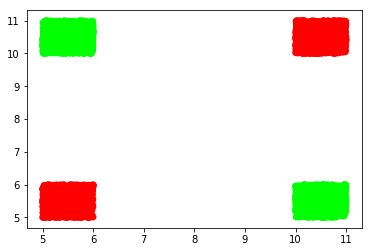

In [147]:
N=1000 # samples per cluster
XY=t.tensor([[5,5],[5,10],[10,5],[10,10]],dtype=t.float32) # 4 cluster centers
Z=t.tensor([0,1,1,0]) # category labels
t.cat([t.randn(2,1)+XY[0,0],t.randn(2,1)+XY[0,1]],1)
xy,z=t.zeros(4*N,2),t.zeros(4*N,dtype=t.int64)
for i in range(4):
    xy[i*N:(i+1)*N,]=t.rand(N,2)+XY[i,]
    z[i*N:(i+1)*N]=Z[i]
xy_np=xy.numpy()
z_np=z.numpy().astype(int)
cmap=np.array([[1,0,0],[0,1,0]])
scatter(xy_np[:,0],xy_np[:,1],color=cmap[z_np]);

#### 2.1 A shallow net with one hidden layer

In [153]:
# Number of free parameters: 2*H+H*2=70

H=35 # number of hidden units
model = t.nn.Sequential(
    t.nn.Linear(2, H, bias=False),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    t.nn.Linear(H, 2, bias=False),
    t.nn.Softmax(dim=1)
)
loss_fn = t.nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model.parameters())

for i in range(100):
    z_pred = model(xy)
    loss = loss_fn(z_pred,z)
    model.zero_grad()
    loss.backward()
    optimizer.step()
    z_pred = model(xy) 
    z_pred = t.max(z_pred,1)[1]
    print('epoch ',i,':',(z_pred==z).sum().item()/xy.shape[0])

epoch  0 : 0.4995
epoch  1 : 0.56425
epoch  2 : 0.63925
epoch  3 : 0.684
epoch  4 : 0.7135
epoch  5 : 0.738
epoch  6 : 0.74825
epoch  7 : 0.75
epoch  8 : 0.75
epoch  9 : 0.75
epoch  10 : 0.75
epoch  11 : 0.75
epoch  12 : 0.75
epoch  13 : 0.75
epoch  14 : 0.75
epoch  15 : 0.75
epoch  16 : 0.75
epoch  17 : 0.75
epoch  18 : 0.75
epoch  19 : 0.75
epoch  20 : 0.75
epoch  21 : 0.75
epoch  22 : 0.75
epoch  23 : 0.76725
epoch  24 : 0.8285
epoch  25 : 0.90375
epoch  26 : 0.946
epoch  27 : 0.9805
epoch  28 : 0.9975
epoch  29 : 1.0
epoch  30 : 1.0
epoch  31 : 1.0
epoch  32 : 1.0
epoch  33 : 1.0
epoch  34 : 1.0
epoch  35 : 1.0
epoch  36 : 1.0
epoch  37 : 1.0
epoch  38 : 1.0
epoch  39 : 1.0
epoch  40 : 1.0
epoch  41 : 1.0
epoch  42 : 1.0
epoch  43 : 1.0
epoch  44 : 1.0
epoch  45 : 1.0
epoch  46 : 1.0
epoch  47 : 1.0
epoch  48 : 1.0
epoch  49 : 1.0
epoch  50 : 1.0
epoch  51 : 1.0
epoch  52 : 1.0
epoch  53 : 1.0
epoch  54 : 1.0
epoch  55 : 1.0
epoch  56 : 1.0
epoch  57 : 1.0
epoch  58 : 1.0
epoch  59

#### 2.2 A "deep" net with three hidden layers

In [155]:
# Number of free parameters: 2*H+H*H+H*H+H*2=70

H=5 # number of hidden units
model = t.nn.Sequential(
    t.nn.Linear(2, H, bias=False),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    t.nn.Linear(H, H,bias=False),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    t.nn.Linear(H, H, bias=False),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    t.nn.Linear(H, 2, bias=False),
    t.nn.Softmax(dim=1)
)
loss_fn = t.nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model.parameters())

for i in range(100):
    z_pred = model(xy)
    loss = loss_fn(z_pred,z)
    model.zero_grad()
    loss.backward()
    optimizer.step()
    z_pred = model(xy) 
    z_pred = t.max(z_pred,1)[1]
    print('epoch ',i,':',(z_pred==z).sum().item()/xy.shape[0])

epoch  0 : 0.5
epoch  1 : 0.5
epoch  2 : 0.5
epoch  3 : 0.5
epoch  4 : 0.5
epoch  5 : 0.5
epoch  6 : 0.5
epoch  7 : 0.5
epoch  8 : 0.5
epoch  9 : 0.5
epoch  10 : 0.5
epoch  11 : 0.5
epoch  12 : 0.5
epoch  13 : 0.503
epoch  14 : 0.5125
epoch  15 : 0.5315
epoch  16 : 0.55125
epoch  17 : 0.57325
epoch  18 : 0.60125
epoch  19 : 0.62475
epoch  20 : 0.647
epoch  21 : 0.66875
epoch  22 : 0.68775
epoch  23 : 0.70625
epoch  24 : 0.71875
epoch  25 : 0.72725
epoch  26 : 0.7345
epoch  27 : 0.73925
epoch  28 : 0.743
epoch  29 : 0.74725
epoch  30 : 0.74775
epoch  31 : 0.7495
epoch  32 : 0.75
epoch  33 : 0.75
epoch  34 : 0.75
epoch  35 : 0.75
epoch  36 : 0.75
epoch  37 : 0.75
epoch  38 : 0.75
epoch  39 : 0.75
epoch  40 : 0.75125
epoch  41 : 0.759
epoch  42 : 0.77275
epoch  43 : 0.78775
epoch  44 : 0.8065
epoch  45 : 0.822
epoch  46 : 0.836
epoch  47 : 0.85275
epoch  48 : 0.86925
epoch  49 : 0.885
epoch  50 : 0.89575
epoch  51 : 0.9055
epoch  52 : 0.9175
epoch  53 : 0.9295
epoch  54 : 0.9385
epoch  55

### 2.3 Your answers

Please respond to the questions here.

從多次整體表現來看，shallow net 的表現的比 deep net 好，跟我原本預期的 deep net 會比較好有落差。推測是在這個case shallow 表現的比較好。我有觀察到deep net work 他會卡在某個值蠻久的，然後訓練的準確率才又提升。

有觀察到的現象：
1. 加入 bias term 表現的比沒有 bias term 好。
2. adam 表現的比 SGD 好
3. 如果把 deep net 的 learning rate 改成0.01 ，結果會比較好。
4. 如果把 deep net 的 activation function 全部都改成 sigmod function，那麼結果會都變成0.5